# Recap about the fundamentals of Deep Learning

📆 What's on the agenda for this recap?

- ***Intro***: How to read the docs
- ***Part 1️⃣***: Tensorflow de-mystified (👨🏻‍🏫 Teacher-led)
- ***Part 2️⃣***: Tensorflow vs Numpy? (👨🏻‍🏫 Teacher-led)
- ***Part 3️⃣***: Forest Fires Challenge (👩‍🎓 Student-led)

## Intro: How to read the docs?

✅ [Tensorflow.org](https://www.tensorflow.org/overview) provides you with two main pages to refer to:
- [Tutorial](https://www.tensorflow.org/tutorials)
- [Guide](https://www.tensorflow.org/guide)
- ***These should be your go-to pages***. You can even run `Colab-Notebooks` of these tutorials

&nbsp;

✅ TensorFlow [API docs](https://www.tensorflow.org/api_docs/python/tf/) contains only essential elements and advanced notions
- It pops up in Google Search in priority
- [Sometimes](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), it can give you references to related Tutorials or Guides
- ***Use it as THE single source of truth***

&nbsp;

❌ [Keras.io](https://keras.io/about/) is somewhat redundant with the TensorFlow documentation
- It contains nice tutorials and examples but...
- ...use it only you don't find what you need on `Tensorflow.Keras`'s website
- ***Don't use it for the docs***

# 1️⃣ - Tensorflow demystified 
_(🧑🏻‍🏫 Teacher-led)_

👉 Goal: Using Tensorflow, create a dummy dataset and fit a dummy model with it

### (1) Tensors?

📚 [Online Guide](https://www.tensorflow.org/guide/tensor)

##### The main selling point of tensors is, since being part of the TensorFlow library, using GPU accelerated computing. Simply put, without any change in code, TensorFlow allows you to parallelize tensor calculations across the cores of a GPU greatly improving speed against its NumPy array counterpart


##### A tensor is a more suitable choice if you’re going to be using GPU’s as it can reside in accelerators memory. Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. Tensors are immutable


##### Tensorflow is a library for artificial intelligence, especially machine learning. Numpy is a library for doing numerical calculations. NumPy and TensorFlow are actually very similar in many respects. Both are, essentially, array manipulation libraries, built around the concept of tensors (or nd-arrays, in NumPy terms).

In [8]:
# It's OK to import everything for notebook based experimentation!
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [223]:
# Tensors are wrappers around numpy objects

X = tf.constant([[1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.]])
X

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [224]:
tf.ones((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [225]:
x = X.numpy()
type(x)
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [226]:
# Tensors have a shape
X.shape

TensorShape([3, 3])

In [227]:
# Tensors can be initialized from Numpy objects
tf.constant(x)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [228]:
# They can be manipulated with syntax that is similar to Numpy
tf.add(X,X)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [229]:
# Conversely, Numpy also accept Tensor elements!
np.add(X,X)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [230]:
# Example of a custom MSE loss function using Tensors
# reduce_mean computes the mean of the elements across dimensions of a tensor

def loss(y_true, y_pred):
    err = y_true - y_pred
    return tf.reduce_mean(tf.square(err))

y_true = tf.ones((10,3))
y_pred = tf.ones((10,3)) + 0.1 * tf.random.normal((10,3))


In [231]:
y_true

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [232]:
y_pred

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[1.1286248 , 1.0104016 , 1.0026015 ],
       [0.896036  , 1.0027652 , 0.86213136],
       [0.79019403, 0.98148304, 1.1337101 ],
       [1.0327336 , 0.91381663, 1.1268033 ],
       [0.9219601 , 1.1153831 , 1.0845314 ],
       [0.95121354, 0.8393953 , 0.8782831 ],
       [0.96583974, 1.0008508 , 0.97040224],
       [0.83297205, 1.2213124 , 0.89960045],
       [1.0335926 , 0.9362235 , 1.246261  ],
       [1.0848209 , 1.0052785 , 0.9834741 ]], dtype=float32)>

In [233]:
print(loss(y_true, y_pred))

tf.Tensor(0.012172548, shape=(), dtype=float32)


#### Other Tensors?

**Sparse Tensors**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/sparse_tensors.png">

In [88]:
# Sparse tensors enable efficient storage and processing of tensors that contain a lot of zero values
# Sparse tensors are used extensively in NLP as words in a corpus are weighted to the zero value
# Sparse tensors are also used for pre-processing images with a lot of dark pixels

In [234]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor.shape

TensorShape([3, 4])

**Ragged Tensors**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/ragged_tensors.png">

In [91]:
# A tensor with variable numbers of elements along some axis
# e.g using a LSTM model to evaluate positive and negative imdb reviews 
# Some reviews are positive some are negative and are of different lengths
# LSTM - the key feature is that it will process the input sequence in order
# and have a cell state which allows it to “remember” information from earlier in the sequence
# Padding the sequences contains no useful information regarding sentiment
# The LSTM layer has “forgotten” what is at the beginning of the review

# With the Ragged approach you can pass inputs of different lengths to your model (ragged=True)
# All input is useful and accuracy likely increases

In [235]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

TensorShape([4, None])

### (2) Build a neural network with `Sequential API`

👉 Let's generate 100 random observations `X` of 10 features each, and a unidimensional target `y` 

In [236]:
# Let's generate 100 observations of with 10 features for each of them
X = tf.random.uniform((100,10))
X.shape

TensorShape([100, 10])

In [237]:
# And create our dummy target as simply the mean of each observation
y = tf.reduce_mean(X, axis=1)
y.shape

TensorShape([100])

👉 Let's build a simple dense model that "works"

In [4]:
from tensorflow.keras import Sequential, layers

In [5]:
# Usual syntax

model = Sequential()
model.add(layers.Dense(30, input_dim=10, activation='relu'))
# model.add(layers.Dense(30, input_shape=(10,), activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [240]:
(10  * 30 + 30) + (30 * 1 + 1)

361

In [241]:
# Equivalent
model = Sequential([
    layers.Dense(30, input_shape=(10, ), activation='relu'),
    layers.Dense(1),
])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 30)                330       
                                                                 
 dense_50 (Dense)            (None, 1)                 31        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [242]:
# What if we don't specify input_dim?
model = Sequential()
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

In [243]:
try:
    model.summary()
    
except ValueError as e:
    print(e)

This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


In [244]:
# One can still access all the layers individually
model.layers

In [245]:
# And call the layer with a "tensor" as input
x1 = model.layers[0](X)

# x1 is our activation from layer 1, with random (initial) weights
x1.shape

TensorShape([100, 30])

In [247]:
# x2 is our output
x2 = model.layers[1](x1)
x2.shape

TensorShape([100, 1])

### (3) Keras Input layer

You will often encounter this in the docs:
```python
keras.Input(shape=(10,))
```
Instead of passing 100 **real** observations to your layers, simply pass a `keras.Input` of `None` observations of similar shape (10,).  

It is used for computation optimization purposes (memory pre-allocation and network graphs for parallelization) 

In [112]:
inputs = keras.Input(shape=(10,))
inputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'input_2')>

In [113]:
model.layers[0](inputs)

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_28')>

In [114]:
x = model.layers[0](inputs) # Input layer
x = layers.Dense(30, activation='relu')(inputs) # First layer output
x = layers.Dense(20, activation='relu')(x) # Second layer output
x = layers.Dense(10, activation='relu')(x) # Third layer output
outputs = layers.Dense(1)(x)               # Final layer output

outputs.shape

TensorShape([None, 1])

In [115]:
# Keras allows you to build a model from an input and output layer
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_30 (Dense)            (None, 30)                330       
                                                                 
 dense_31 (Dense)            (None, 20)                620       
                                                                 
 dense_32 (Dense)            (None, 10)                210       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


☝️ This way of building models is called Keras [Functional API](https://www.tensorflow.org/guide/keras/functional)
- as opposed to [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): `model.add(...)`
- It is mandatory for complex (non-sequential) architecture...
- Used everywhere in the docs

### The Keras functional API is a way to create models that are more flexible

The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs which cannot be handled with sequential models

For example, if you're building a system for ranking customer issue tickets by priority and routing them to the correct department, then the model will have three inputs:

- the title of the ticket (text input),
- the text body of the ticket (text input), and
- any tags added by the user (categorical input)

This model will have two outputs:

- the priority score between 0 and 1 (scalar sigmoid output), and
- the department that should handle the ticket (softmax output over the set of departments).

You can build this model in a few lines with the functional API:

In [ ]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints

body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints

tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)

# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

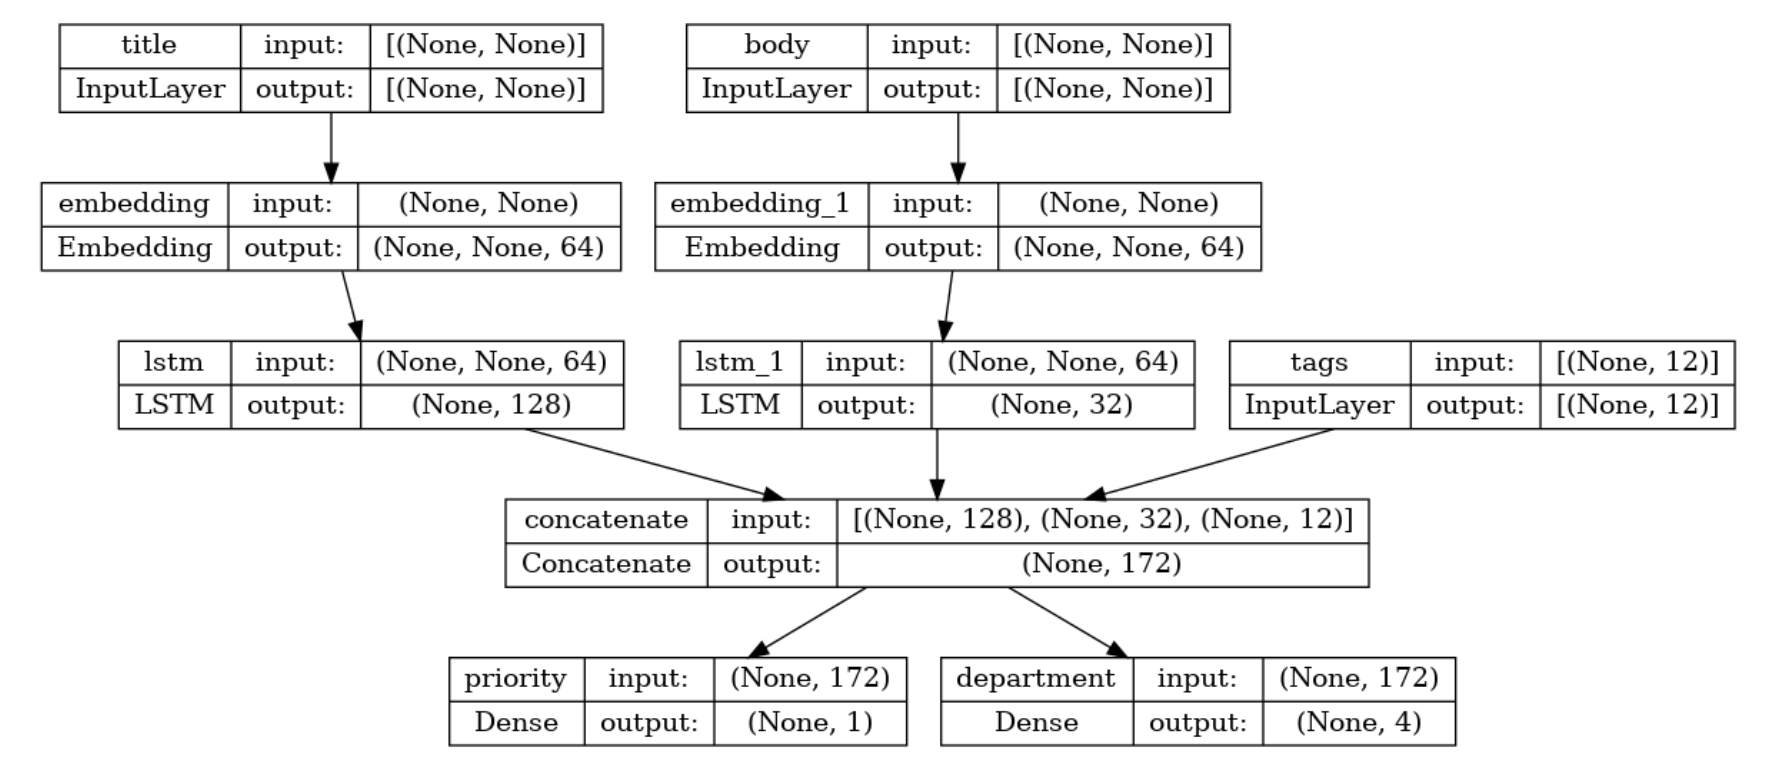

When compiling this model, you can assign different losses to each output. You can even assign different weights to each loss -- to modulate their contribution to the total training loss

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam,
    loss={
        "priority": keras.losses.BinaryCrossentropy(),
        "department": keras.losses.CategoricalCrossentropy(),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

# 2️⃣ - Tensorflow vs. Numpy?

### Difference between an array and a tensor?

👉 The important differences between NumPy arrays and tf.Tensors are:

1. Tensors are immutable
2. Tensors can be backed by accelerator memory (like GPU, TPU)

**Immutable**

In [248]:
# an array element can be reassigned

array = np.array([1,1,1])

array[1] = 2

array

array([1, 2, 1])

In [249]:
# a tensor element can't be reassigned

tensor = tf.constant([1., 1., 1.])

tensor[1] = 2

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

**Backed by accelerator memory**

Tensors are backed by accelerator memory (like GPU, TPU). You can manually select the processor on which to perform your tensor operations.

⏩⏩⏩ Check out the [documentation](https://www.tensorflow.org/guide/gpu).

In [60]:
# Check CPU's available
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num CPUs Available:  1


In [61]:
# Check GPU's available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


It is unliklely that your computer will have a GPU... Guess who offers free GPU usage? Google! 

👉 **Let's switch to Google Colab to continue the recap and compare the processing times.**

In [45]:
# If you've set up Colab correctly, you should have a GPU avaiable.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
# Matrix multiplication function performing operation and returning us the time.
import time

def time_matmul(types,x):

    start = time.time() 

    if types=='numpy':
        np.matmul(x,x)

    else:
        tf.matmul(x,x)

    diff = time.time() - start

    return diff*1000


👇 Run this cell twice (the first time it runs, tensorflow compilation for GPU takes a bit of time)

In [62]:
shape_dim = []
num_time = []
cpu_tf_time = []
gpu_tf_time = []

for shape in range(500,2001,100):

    print(f"Multiplication of shape [{shape},{shape}]")

  # Start with shape 500,500 to 2000,2000 with an increase of 100
    shape_dim.append(shape)

  # Numpy multiplication
    x_np = np.random.uniform(size=[shape,shape])
    num_time.append(time_matmul('numpy',x_np))
  
  #Tensor in CPU
    with tf.device("CPU:0"):
        x = tf.random.uniform([shape, shape])
        cpu_tf_time.append(time_matmul('cpu',x))
        
  #Tensor in GPU multiplication
    with tf.device("GPU:0"): #Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
        x = tf.random.uniform([shape, shape])
        gpu_tf_time.append(time_matmul('gpu',x))

print("Done multiplying!")

Multiplication of shape [500,500]
Multiplication of shape [600,600]
Multiplication of shape [700,700]
Multiplication of shape [800,800]
Multiplication of shape [900,900]
Multiplication of shape [1000,1000]
Multiplication of shape [1100,1100]
Multiplication of shape [1200,1200]
Multiplication of shape [1300,1300]
Multiplication of shape [1400,1400]
Multiplication of shape [1500,1500]
Multiplication of shape [1600,1600]
Multiplication of shape [1700,1700]
Multiplication of shape [1800,1800]
Multiplication of shape [1900,1900]
Multiplication of shape [2000,2000]
Done multiplying!


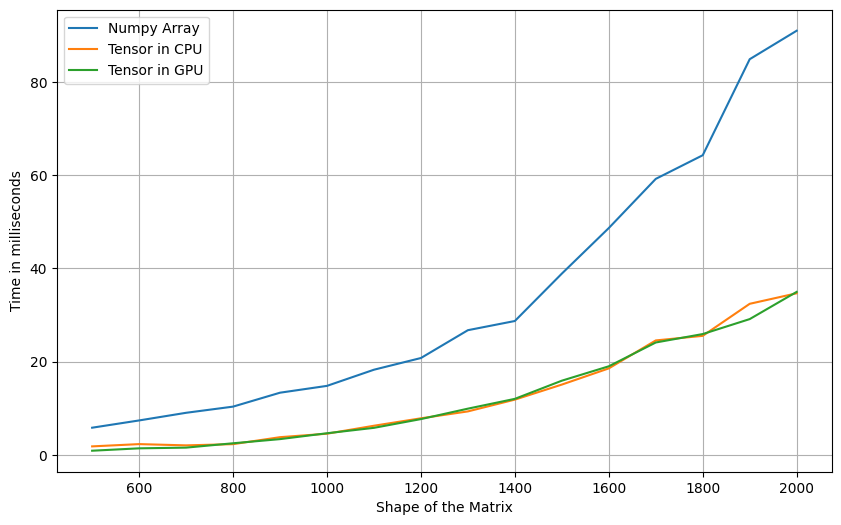

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(shape_dim, num_time, label="Numpy Array")
plt.plot(shape_dim, cpu_tf_time, label="Tensor in CPU")
plt.plot(shape_dim, gpu_tf_time, label="Tensor in GPU")
plt.grid()
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time in milliseconds")
plt.legend()

GPUs use parallel processing, dividing tasks into smaller subtasks that are distributed among a vast number of processor cores in the GPU. This results in faster processing of specialized computing tasks

👉 **Check out our [tutorial](https://kitt.lewagon.com/knowledge/tutorials/data_google_colab) on how to set up Google Colab, you'll be using it in the coming days**

# 3️⃣ (optional) - Forest Fires Challenge 
(👩‍🎓Student-led)

### (1) Data

`tensorflow_dataset` provides many `Datasets` that can be found <a href="https://www.tensorflow.org/datasets/catalog/overview">here</a>

Let's load the **`forest_fires`** dataset. The target is area damaged by fire (more details here https://www.tensorflow.org/datasets/catalog/forest_fires).

In [48]:
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.model_selection import train_test_split

In [49]:
area, features = tfds.as_numpy(tfds.load(
    'forest_fires',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

In [50]:
X = pd.DataFrame(features).values
y = area
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y = area

### (2) Declare the general architecture of your model



❓ Import Keras and declare a Sequential model

In [51]:
from tensorflow.keras import models, Sequential, layers

In [52]:
model = Sequential()

❓ Add a Dense layer with 50 neurons and the `relu` activation function. Do not forget to specify your `input_dim` for the first layer.

In [53]:
X_train.shape

(361, 12)

In [54]:
model.add(layers.Dense(50, activation='relu', input_dim=12))

❓ Add a second fully connected layer, with 20 neurons and the `relu` activation function.

In [55]:
model.add(layers.Dense(20, activation='relu'))

❓ Add a last layer that suits your regression task

In [56]:
model.add(layers.Dense(1, activation='linear'))

❓ Check the number of parameters of your model.

Re-count them manually to make sure you understood the numbers of parameters involved in each layer of your Dense Neural Network

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                650       
                                                                 
 dense_11 (Dense)            (None, 20)                1020      
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


In [58]:
(50*12 +50) + (50 * 20 + 20) + (20 * 1+1)

1691

### (3) Define how your model is trained
 


❓ Compile the model with the `adam` `optimizer` and the `mse` `loss`

In [59]:
model.compile(loss='mse', optimizer='adam')

❓Run the model on this random data; don't forget to select a number of `epochs` and a `batch_size`. Store the returned result in `history`.

In [39]:
history = model.fit(X_train, y_train, batch_size=16, epochs=2000)

Epoch 1/2000
23/23 [==============================] - 1s 1ms/step - loss: 5667.1655
Epoch 2/2000
23/23 [==============================] - 0s 1ms/step - loss: 5445.9414
Epoch 3/2000
23/23 [==============================] - 0s 1ms/step - loss: 5490.3818
Epoch 4/2000
23/23 [==============================] - 0s 2ms/step - loss: 5409.1709
Epoch 5/2000
23/23 [==============================] - 0s 1ms/step - loss: 5423.7329
Epoch 6/2000
23/23 [==============================] - 0s 2ms/step - loss: 5367.0015
Epoch 7/2000
23/23 [==============================] - 0s 1ms/step - loss: 5349.5801
Epoch 8/2000
23/23 [==============================] - 0s 2ms/step - loss: 5501.5269
Epoch 9/2000
23/23 [==============================] - 0s 2ms/step - loss: 5311.7354
Epoch 10/2000
23/23 [==============================] - 0s 1ms/step - loss: 5393.4473
Epoch 11/2000
23/23 [==============================] - 0s 2ms/step - loss: 5360.2808
Epoch 12/2000
23/23 [==============================] - 0s 2ms/step - loss:

23/23 [==============================] - 0s 2ms/step - loss: 5190.8940
Epoch 98/2000
23/23 [==============================] - 0s 2ms/step - loss: 5207.5693
Epoch 99/2000
23/23 [==============================] - 0s 2ms/step - loss: 5271.5542
Epoch 100/2000
23/23 [==============================] - 0s 2ms/step - loss: 5199.9600
Epoch 101/2000
23/23 [==============================] - 0s 2ms/step - loss: 5223.3569
Epoch 102/2000
23/23 [==============================] - 0s 2ms/step - loss: 5237.5059
Epoch 103/2000
23/23 [==============================] - 0s 1ms/step - loss: 5294.5679
Epoch 104/2000
23/23 [==============================] - 0s 1ms/step - loss: 5218.2075
Epoch 105/2000
23/23 [==============================] - 0s 1ms/step - loss: 5265.3721
Epoch 106/2000
23/23 [==============================] - 0s 1ms/step - loss: 5189.7607
Epoch 107/2000
23/23 [==============================] - 0s 2ms/step - loss: 5190.1792
Epoch 108/2000
23/23 [==============================] - 0s 1ms/step - l

23/23 [==============================] - 0s 1ms/step - loss: 5130.5542
Epoch 193/2000
23/23 [==============================] - 0s 1ms/step - loss: 5081.9473
Epoch 194/2000
23/23 [==============================] - 0s 1ms/step - loss: 5067.8530
Epoch 195/2000
23/23 [==============================] - 0s 1ms/step - loss: 5090.0591
Epoch 196/2000
23/23 [==============================] - 0s 1ms/step - loss: 5125.7563
Epoch 197/2000
23/23 [==============================] - 0s 1ms/step - loss: 5112.4321
Epoch 198/2000
23/23 [==============================] - 0s 1ms/step - loss: 5066.0327
Epoch 199/2000
23/23 [==============================] - 0s 1ms/step - loss: 5129.3213
Epoch 200/2000
23/23 [==============================] - 0s 1ms/step - loss: 5116.6475
Epoch 201/2000
23/23 [==============================] - 0s 1ms/step - loss: 5140.8423
Epoch 202/2000
23/23 [==============================] - 0s 1ms/step - loss: 5065.2993
Epoch 203/2000
23/23 [==============================] - 0s 2ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 4985.8315
Epoch 288/2000
23/23 [==============================] - 0s 1ms/step - loss: 4996.2803
Epoch 289/2000
23/23 [==============================] - 0s 1ms/step - loss: 5046.8076
Epoch 290/2000
23/23 [==============================] - 0s 1ms/step - loss: 4979.0132
Epoch 291/2000
23/23 [==============================] - 0s 1ms/step - loss: 4973.3564
Epoch 292/2000
23/23 [==============================] - 0s 1ms/step - loss: 4947.2837
Epoch 293/2000
23/23 [==============================] - 0s 1ms/step - loss: 4973.9971
Epoch 294/2000
23/23 [==============================] - 0s 2ms/step - loss: 4978.0430
Epoch 295/2000
23/23 [==============================] - 0s 1ms/step - loss: 4949.1777
Epoch 296/2000
23/23 [==============================] - 0s 1ms/step - loss: 4973.1836
Epoch 297/2000
23/23 [==============================] - 0s 1ms/step - loss: 4954.0664
Epoch 298/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 4857.0303
Epoch 383/2000
23/23 [==============================] - 0s 1ms/step - loss: 4838.7246
Epoch 384/2000
23/23 [==============================] - 0s 1ms/step - loss: 4859.9741
Epoch 385/2000
23/23 [==============================] - 0s 1ms/step - loss: 4849.1362
Epoch 386/2000
23/23 [==============================] - 0s 1ms/step - loss: 4853.9854
Epoch 387/2000
23/23 [==============================] - 0s 1ms/step - loss: 4821.0239
Epoch 388/2000
23/23 [==============================] - 0s 1ms/step - loss: 4895.8076
Epoch 389/2000
23/23 [==============================] - 0s 1ms/step - loss: 4897.9150
Epoch 390/2000
23/23 [==============================] - 0s 1ms/step - loss: 4918.8608
Epoch 391/2000
23/23 [==============================] - 0s 1ms/step - loss: 4867.5083
Epoch 392/2000
23/23 [==============================] - 0s 1ms/step - loss: 4850.9849
Epoch 393/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 2ms/step - loss: 4789.2842
Epoch 478/2000
23/23 [==============================] - 0s 2ms/step - loss: 4660.3452
Epoch 479/2000
23/23 [==============================] - 0s 2ms/step - loss: 4789.0947
Epoch 480/2000
23/23 [==============================] - 0s 2ms/step - loss: 4748.7026
Epoch 481/2000
23/23 [==============================] - 0s 1ms/step - loss: 4684.2222
Epoch 482/2000
23/23 [==============================] - 0s 1ms/step - loss: 4688.2554
Epoch 483/2000
23/23 [==============================] - 0s 1ms/step - loss: 4778.8340
Epoch 484/2000
23/23 [==============================] - 0s 1ms/step - loss: 4733.5630
Epoch 485/2000
23/23 [==============================] - 0s 1ms/step - loss: 4708.8188
Epoch 486/2000
23/23 [==============================] - 0s 1ms/step - loss: 4852.4268
Epoch 487/2000
23/23 [==============================] - 0s 1ms/step - loss: 4801.6011
Epoch 488/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 4678.8657
Epoch 573/2000
23/23 [==============================] - 0s 1ms/step - loss: 4568.0493
Epoch 574/2000
23/23 [==============================] - 0s 1ms/step - loss: 4506.3921
Epoch 575/2000
23/23 [==============================] - 0s 1ms/step - loss: 4603.1143
Epoch 576/2000
23/23 [==============================] - 0s 1ms/step - loss: 4904.2563
Epoch 577/2000
23/23 [==============================] - 0s 1ms/step - loss: 4752.6743
Epoch 578/2000
23/23 [==============================] - 0s 1ms/step - loss: 4659.8628
Epoch 579/2000
23/23 [==============================] - 0s 1ms/step - loss: 4714.3638
Epoch 580/2000
23/23 [==============================] - 0s 1ms/step - loss: 4596.5688
Epoch 581/2000
23/23 [==============================] - 0s 1ms/step - loss: 4445.9053
Epoch 582/2000
23/23 [==============================] - 0s 1ms/step - loss: 4621.0132
Epoch 583/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 4368.3140
Epoch 668/2000
23/23 [==============================] - 0s 1ms/step - loss: 4277.3755
Epoch 669/2000
23/23 [==============================] - 0s 1ms/step - loss: 4272.1377
Epoch 670/2000
23/23 [==============================] - 0s 1ms/step - loss: 4292.5361
Epoch 671/2000
23/23 [==============================] - 0s 1ms/step - loss: 4290.5957
Epoch 672/2000
23/23 [==============================] - 0s 1ms/step - loss: 4283.5864
Epoch 673/2000
23/23 [==============================] - 0s 1ms/step - loss: 4524.6948
Epoch 674/2000
23/23 [==============================] - 0s 1ms/step - loss: 4495.4805
Epoch 675/2000
23/23 [==============================] - 0s 1ms/step - loss: 4514.4312
Epoch 676/2000
23/23 [==============================] - 0s 1ms/step - loss: 4473.3096
Epoch 677/2000
23/23 [==============================] - 0s 1ms/step - loss: 4329.5815
Epoch 678/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 4068.3816
Epoch 763/2000
23/23 [==============================] - 0s 1ms/step - loss: 3991.2490
Epoch 764/2000
23/23 [==============================] - 0s 1ms/step - loss: 4006.5356
Epoch 765/2000
23/23 [==============================] - 0s 1ms/step - loss: 4099.2686
Epoch 766/2000
23/23 [==============================] - 0s 1ms/step - loss: 4036.3542
Epoch 767/2000
23/23 [==============================] - 0s 1ms/step - loss: 4063.7534
Epoch 768/2000
23/23 [==============================] - 0s 1ms/step - loss: 3880.4436
Epoch 769/2000
23/23 [==============================] - 0s 1ms/step - loss: 3965.1431
Epoch 770/2000
23/23 [==============================] - 0s 1ms/step - loss: 4234.9395
Epoch 771/2000
23/23 [==============================] - 0s 1ms/step - loss: 4117.0273
Epoch 772/2000
23/23 [==============================] - 0s 1ms/step - loss: 4106.4102
Epoch 773/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 3543.1475
Epoch 858/2000
23/23 [==============================] - 0s 1ms/step - loss: 3672.3875
Epoch 859/2000
23/23 [==============================] - 0s 1ms/step - loss: 3676.1499
Epoch 860/2000
23/23 [==============================] - 0s 1ms/step - loss: 3856.8062
Epoch 861/2000
23/23 [==============================] - 0s 1ms/step - loss: 3764.3020
Epoch 862/2000
23/23 [==============================] - 0s 1ms/step - loss: 3728.3682
Epoch 863/2000
23/23 [==============================] - 0s 1ms/step - loss: 3669.6514
Epoch 864/2000
23/23 [==============================] - 0s 1ms/step - loss: 3548.6814
Epoch 865/2000
23/23 [==============================] - 0s 2ms/step - loss: 3824.3047
Epoch 866/2000
23/23 [==============================] - 0s 1ms/step - loss: 3925.9180
Epoch 867/2000
23/23 [==============================] - 0s 1ms/step - loss: 3479.7781
Epoch 868/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 3163.7449
Epoch 953/2000
23/23 [==============================] - 0s 1ms/step - loss: 3193.1558
Epoch 954/2000
23/23 [==============================] - 0s 2ms/step - loss: 2834.2986
Epoch 955/2000
23/23 [==============================] - 0s 2ms/step - loss: 3185.6260
Epoch 956/2000
23/23 [==============================] - 0s 2ms/step - loss: 3138.4688
Epoch 957/2000
23/23 [==============================] - 0s 1ms/step - loss: 3440.9231
Epoch 958/2000
23/23 [==============================] - 0s 2ms/step - loss: 3109.6555
Epoch 959/2000
23/23 [==============================] - 0s 2ms/step - loss: 3495.7253
Epoch 960/2000
23/23 [==============================] - 0s 1ms/step - loss: 3513.8645
Epoch 961/2000
23/23 [==============================] - 0s 2ms/step - loss: 3279.0679
Epoch 962/2000
23/23 [==============================] - 0s 2ms/step - loss: 3226.4998
Epoch 963/2000
23/23 [==============================] - 0s 1ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 2763.7734
Epoch 1047/2000
23/23 [==============================] - 0s 1ms/step - loss: 2560.6265
Epoch 1048/2000
23/23 [==============================] - 0s 1ms/step - loss: 2641.9634
Epoch 1049/2000
23/23 [==============================] - 0s 1ms/step - loss: 2966.9592
Epoch 1050/2000
23/23 [==============================] - 0s 1ms/step - loss: 2652.4873
Epoch 1051/2000
23/23 [==============================] - 0s 1ms/step - loss: 2607.5215
Epoch 1052/2000
23/23 [==============================] - 0s 1ms/step - loss: 2928.3123
Epoch 1053/2000
23/23 [==============================] - 0s 1ms/step - loss: 3379.0024
Epoch 1054/2000
23/23 [==============================] - 0s 1ms/step - loss: 3031.8384
Epoch 1055/2000
23/23 [==============================] - 0s 1ms/step - loss: 2636.8528
Epoch 1056/2000
23/23 [==============================] - 0s 1ms/step - loss: 2427.0796
Epoch 1057/2000
23/23 [==============================] - 0s

23/23 [==============================] - 0s 1ms/step - loss: 2383.7341
Epoch 1141/2000
23/23 [==============================] - 0s 1ms/step - loss: 2304.1809
Epoch 1142/2000
23/23 [==============================] - 0s 1ms/step - loss: 2944.2153
Epoch 1143/2000
23/23 [==============================] - 0s 1ms/step - loss: 2879.0872
Epoch 1144/2000
23/23 [==============================] - 0s 1ms/step - loss: 2190.4001
Epoch 1145/2000
23/23 [==============================] - 0s 1ms/step - loss: 2418.0720
Epoch 1146/2000
23/23 [==============================] - 0s 1ms/step - loss: 2092.1560
Epoch 1147/2000
23/23 [==============================] - 0s 1ms/step - loss: 2701.6702
Epoch 1148/2000
23/23 [==============================] - 0s 1ms/step - loss: 2014.0981
Epoch 1149/2000
23/23 [==============================] - 0s 1ms/step - loss: 2669.3452
Epoch 1150/2000
23/23 [==============================] - 0s 1ms/step - loss: 2094.2598
Epoch 1151/2000
23/23 [==============================] - 0s

23/23 [==============================] - 0s 1ms/step - loss: 2150.1836
Epoch 1235/2000
23/23 [==============================] - 0s 1ms/step - loss: 2231.9348
Epoch 1236/2000
23/23 [==============================] - 0s 1ms/step - loss: 2153.1272
Epoch 1237/2000
23/23 [==============================] - 0s 1ms/step - loss: 2095.6865
Epoch 1238/2000
23/23 [==============================] - 0s 1ms/step - loss: 1880.1714
Epoch 1239/2000
23/23 [==============================] - 0s 1ms/step - loss: 2313.8533
Epoch 1240/2000
23/23 [==============================] - 0s 1ms/step - loss: 1930.1918
Epoch 1241/2000
23/23 [==============================] - 0s 1ms/step - loss: 1572.2924
Epoch 1242/2000
23/23 [==============================] - 0s 1ms/step - loss: 1568.9901
Epoch 1243/2000
23/23 [==============================] - 0s 1ms/step - loss: 1736.3317
Epoch 1244/2000
23/23 [==============================] - 0s 1ms/step - loss: 1501.6317
Epoch 1245/2000
23/23 [==============================] - 0s

23/23 [==============================] - 0s 2ms/step - loss: 1229.6346
Epoch 1329/2000
23/23 [==============================] - 0s 2ms/step - loss: 1059.2241
Epoch 1330/2000
23/23 [==============================] - 0s 1ms/step - loss: 1237.6599
Epoch 1331/2000
23/23 [==============================] - 0s 1ms/step - loss: 1119.1671
Epoch 1332/2000
23/23 [==============================] - 0s 1ms/step - loss: 1292.6865
Epoch 1333/2000
23/23 [==============================] - 0s 1ms/step - loss: 1208.6971
Epoch 1334/2000
23/23 [==============================] - 0s 1ms/step - loss: 2153.6672
Epoch 1335/2000
23/23 [==============================] - 0s 1ms/step - loss: 2994.0894
Epoch 1336/2000
23/23 [==============================] - 0s 1ms/step - loss: 1334.2587
Epoch 1337/2000
23/23 [==============================] - 0s 1ms/step - loss: 1922.4858
Epoch 1338/2000
23/23 [==============================] - 0s 1ms/step - loss: 1299.0477
Epoch 1339/2000
23/23 [==============================] - 0s

23/23 [==============================] - 0s 1ms/step - loss: 4715.3628
Epoch 1423/2000
23/23 [==============================] - 0s 1ms/step - loss: 4703.2690
Epoch 1424/2000
23/23 [==============================] - 0s 1ms/step - loss: 4721.9795
Epoch 1425/2000
23/23 [==============================] - 0s 1ms/step - loss: 4694.4502
Epoch 1426/2000
23/23 [==============================] - 0s 1ms/step - loss: 4691.5439
Epoch 1427/2000
23/23 [==============================] - 0s 1ms/step - loss: 4678.9834
Epoch 1428/2000
23/23 [==============================] - 0s 1ms/step - loss: 4704.5029
Epoch 1429/2000
23/23 [==============================] - 0s 1ms/step - loss: 4660.8672
Epoch 1430/2000
23/23 [==============================] - 0s 1ms/step - loss: 4705.2764
Epoch 1431/2000
23/23 [==============================] - 0s 1ms/step - loss: 4702.5576
Epoch 1432/2000
23/23 [==============================] - 0s 1ms/step - loss: 4678.4556
Epoch 1433/2000
23/23 [==============================] - 0s

23/23 [==============================] - 0s 1ms/step - loss: 1028.7739
Epoch 1517/2000
23/23 [==============================] - 0s 1ms/step - loss: 1330.1326
Epoch 1518/2000
23/23 [==============================] - 0s 1ms/step - loss: 1502.3866
Epoch 1519/2000
23/23 [==============================] - 0s 1ms/step - loss: 1222.0781
Epoch 1520/2000
23/23 [==============================] - 0s 1ms/step - loss: 1034.0895
Epoch 1521/2000
23/23 [==============================] - 0s 1ms/step - loss: 1148.1711
Epoch 1522/2000
23/23 [==============================] - 0s 1ms/step - loss: 1017.5336
Epoch 1523/2000
23/23 [==============================] - 0s 1ms/step - loss: 930.2009
Epoch 1524/2000
23/23 [==============================] - 0s 1ms/step - loss: 1402.5436
Epoch 1525/2000
23/23 [==============================] - 0s 1ms/step - loss: 1138.6641
Epoch 1526/2000
23/23 [==============================] - 0s 1ms/step - loss: 1268.5959
Epoch 1527/2000
23/23 [==============================] - 0s 

23/23 [==============================] - 0s 1ms/step - loss: 507.6808
Epoch 1611/2000
23/23 [==============================] - 0s 1ms/step - loss: 691.8811
Epoch 1612/2000
23/23 [==============================] - 0s 1ms/step - loss: 957.7742
Epoch 1613/2000
23/23 [==============================] - 0s 1ms/step - loss: 1046.2457
Epoch 1614/2000
23/23 [==============================] - 0s 1ms/step - loss: 1560.7843
Epoch 1615/2000
23/23 [==============================] - 0s 1ms/step - loss: 1458.8052
Epoch 1616/2000
23/23 [==============================] - 0s 1ms/step - loss: 1838.2260
Epoch 1617/2000
23/23 [==============================] - 0s 1ms/step - loss: 1052.5347
Epoch 1618/2000
23/23 [==============================] - 0s 1ms/step - loss: 4050.0381
Epoch 1619/2000
23/23 [==============================] - 0s 1ms/step - loss: 1095.6821
Epoch 1620/2000
23/23 [==============================] - 0s 1ms/step - loss: 731.9855
Epoch 1621/2000
23/23 [==============================] - 0s 1ms

23/23 [==============================] - 0s 1ms/step - loss: 293.2399
Epoch 1706/2000
23/23 [==============================] - 0s 1ms/step - loss: 288.0337
Epoch 1707/2000
23/23 [==============================] - 0s 1ms/step - loss: 293.2663
Epoch 1708/2000
23/23 [==============================] - 0s 1ms/step - loss: 352.7738
Epoch 1709/2000
23/23 [==============================] - 0s 1ms/step - loss: 299.8522
Epoch 1710/2000
23/23 [==============================] - 0s 1ms/step - loss: 288.6792
Epoch 1711/2000
23/23 [==============================] - 0s 1ms/step - loss: 288.4371
Epoch 1712/2000
23/23 [==============================] - 0s 1ms/step - loss: 291.8237
Epoch 1713/2000
23/23 [==============================] - 0s 1ms/step - loss: 311.2215
Epoch 1714/2000
23/23 [==============================] - 0s 1ms/step - loss: 310.9264
Epoch 1715/2000
23/23 [==============================] - 0s 1ms/step - loss: 1022.4174
Epoch 1716/2000
23/23 [==============================] - 0s 1ms/step 

23/23 [==============================] - 0s 1ms/step - loss: 4487.8281
Epoch 1800/2000
23/23 [==============================] - 0s 1ms/step - loss: 4406.5586
Epoch 1801/2000
23/23 [==============================] - 0s 1ms/step - loss: 4429.7905
Epoch 1802/2000
23/23 [==============================] - 0s 1ms/step - loss: 4408.9424
Epoch 1803/2000
23/23 [==============================] - 0s 1ms/step - loss: 4397.2363
Epoch 1804/2000
23/23 [==============================] - 0s 1ms/step - loss: 4462.6387
Epoch 1805/2000
23/23 [==============================] - 0s 1ms/step - loss: 4364.1577
Epoch 1806/2000
23/23 [==============================] - 0s 1ms/step - loss: 4479.7095
Epoch 1807/2000
23/23 [==============================] - 0s 1ms/step - loss: 4595.5527
Epoch 1808/2000
23/23 [==============================] - 0s 1ms/step - loss: 4502.7222
Epoch 1809/2000
23/23 [==============================] - 0s 1ms/step - loss: 4461.2432
Epoch 1810/2000
23/23 [==============================] - 0s

23/23 [==============================] - 0s 3ms/step - loss: 4295.1123
Epoch 1894/2000
23/23 [==============================] - 0s 1ms/step - loss: 4171.3525
Epoch 1895/2000
23/23 [==============================] - 0s 2ms/step - loss: 4123.5513
Epoch 1896/2000
23/23 [==============================] - 0s 1ms/step - loss: 4200.1040
Epoch 1897/2000
23/23 [==============================] - 0s 1ms/step - loss: 4066.4023
Epoch 1898/2000
23/23 [==============================] - 0s 1ms/step - loss: 4096.1382
Epoch 1899/2000
23/23 [==============================] - 0s 1ms/step - loss: 4147.0010
Epoch 1900/2000
23/23 [==============================] - 0s 1ms/step - loss: 4216.5005
Epoch 1901/2000
23/23 [==============================] - 0s 1ms/step - loss: 4237.4912
Epoch 1902/2000
23/23 [==============================] - 0s 1ms/step - loss: 4106.0020
Epoch 1903/2000
23/23 [==============================] - 0s 1ms/step - loss: 4167.4136
Epoch 1904/2000
23/23 [==============================] - 0s

23/23 [==============================] - 0s 1ms/step - loss: 3974.1125
Epoch 1988/2000
23/23 [==============================] - 0s 1ms/step - loss: 3820.5491
Epoch 1989/2000
23/23 [==============================] - 0s 1ms/step - loss: 4143.1875
Epoch 1990/2000
23/23 [==============================] - 0s 1ms/step - loss: 3852.2358
Epoch 1991/2000
23/23 [==============================] - 0s 1ms/step - loss: 3765.8521
Epoch 1992/2000
23/23 [==============================] - 0s 1ms/step - loss: 3778.7466
Epoch 1993/2000
23/23 [==============================] - 0s 1ms/step - loss: 3740.3242
Epoch 1994/2000
23/23 [==============================] - 0s 2ms/step - loss: 3867.9009
Epoch 1995/2000
23/23 [==============================] - 0s 2ms/step - loss: 3923.7656
Epoch 1996/2000
23/23 [==============================] - 0s 2ms/step - loss: 3882.8325
Epoch 1997/2000
23/23 [==============================] - 0s 1ms/step - loss: 3856.4702
Epoch 1998/2000
23/23 [==============================] - 0s

❓ Write an entire model with its compilation within an `init_model` function

In [218]:
def init_model():
    model = Sequential()
    model.add(layers.Dense(50, input_dim=12,  activation='relu'))
    model.add(layers.Dense(20, activation="relu"))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mse')
    return model

In [182]:
# def init_model():
#     model = models.Sequential()
#     model.add(layers.Dense(50, input_dim=12, activation="relu"))
#     model.add(layers.Dense(20, activation="relu"))
#     model.add(layers.Dense(1, activation="linear"))
    
#     model.compile(optimizer="adam", loss='mse')
    
#     return model

You are advised to systematically rebuild a model (with an init function) before fitting some data in order to re-initialize the model's parameters.

The model you just wrote is suited for regression tasks.

What if we want to perform a binary classification task?

❓ Write another `init_model_2` function in which you will change:
* the last layer of the architecture 
* and the compilation method

used in a binary class classification problem.

In [220]:
def init_model_2():
    model = Sequential()
    model.add(layers.Dense(50, input_dim=12,  activation='relu'))
    model.add(layers.Dense(20, activation="relu"))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

In [ ]:
model = init_model

In [183]:
# def init_model_2():
#     model = models.Sequential()
#     model.add(layers.Dense(50, input_dim=12, activation="relu"))
#     model.add(layers.Dense(20, activation="relu"))
#     model.add(layers.Dense(1, activation="sigmoid"))
    
#     model.compile(optimizer="binary_crossentropy", loss='mse')
    
#     return model

❓ Write a last function to define a model for a classification problem with 10 classes.

In [221]:
def init_model_2():
    model = Sequential()
    model.add(layers.Dense(50, input_dim=12,  activation='relu'))
    model.add(layers.Dense(20, activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

In [184]:
# def init_model_3():
#     model = models.Sequential()
#     model.add(layers.Dense(50, input_dim=12, activation="relu"))
#     model.add(layers.Dense(20, activation="relu"))
#     model.add(layers.Dense(10, activation="softmax"))
    
#     model.compile(optimizer="categorical_crossentropy", loss='mse')
    
#     return model